<a href="https://colab.research.google.com/github/Sunnn-y/SKhynix_Project/blob/main/lasso%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 전체 뉴스 데이터로 학습

In [10]:
df = pd.read_csv('/content/drive/MyDrive/SK하이닉스/filtered_sk_volume.csv', header=0)
df

,date,trading_volume,news_volume
0,2018-10-02,4089558,44
1,2018-10-04,5778810,204
2,2018-10-05,5508014,63
3,2018-10-08,2856291,67
4,2018-10-10,4161114,101
...,...,...,...
1229,2023-09-21,3151900,64
1230,2023-09-22,2938386,77
1231,2023-09-25,2181722,47
1232,2023-09-26,3237819,70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


알파값 : 3.2925188031241016e-05
예측된 y :
[0.11691226 0.12534428 0.12815496 0.15274836 0.14080299 0.12112827
 0.13588431 0.1316683  0.12393895 0.14642434 0.14220833 0.12183094
 0.13026296 0.12183094 0.11339892 0.12393895 0.13096563 0.12393895
 0.11058824 0.11199358 0.1316683  0.11339892 0.12674962 0.1316683
 0.12604695 0.12885763 0.12534428 0.14782968 0.1204256  0.13939765
 0.142911   0.11902027 0.12323628 0.13869499 0.16609906 0.1183176
 0.14572167 0.12674962 0.11761493 0.13869499 0.10566956 0.13588431
 0.16188305 0.14993768 0.12393895 0.14080299 0.10215622 0.17663909
 0.11691226 0.15064035 0.14853235 0.11199358 0.11058824 0.1204256
 0.13658698 0.15134302 0.12183094 0.1183176  0.14572167 0.12956029
 0.12956029 0.14220833 0.14993768 0.12253361 0.19912448 0.11902027
 0.13518164 0.11058824 0.13096563 0.12112827 0.12674962 0.11199358
 0.15907237 0.12183094 0.11058824 0.18577378 0.12745229 0.14150566
 0.13307364 0.11480425 0.22160988 0.10637223 0.11691226 0.12393895
 0.14010032 0.12674962 0.105

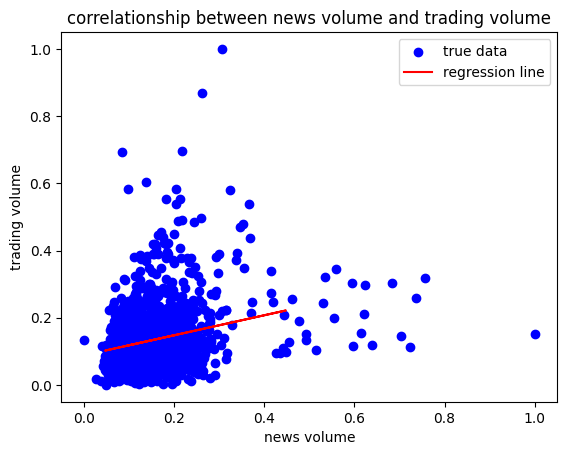

In [11]:
# MinMaxScaler를 사용한 표준화
scaler = MinMaxScaler()
df['trading_volume_scaled'] = scaler.fit_transform(df['trading_volume'].values.reshape(-1, 1))
df['news_volume_scaled'] = scaler.fit_transform(df['news_volume'].values.reshape(-1, 1))

# print(df.head)

# x : 기사량, y : 거래량
X = df['news_volume_scaled'].values.reshape(-1, 1)
y = df['trading_volume_scaled'].values.reshape(-1, 1)

# 훈련데이터 테스트데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 라쏘 k-fold 수행
cv = 100
lasso_cv = LassoCV(cv=cv, random_state=0)
lasso_cv.fit(X, y)

# 알파값 찾기
best_alpha = lasso_cv.alpha_
print('알파값 :', best_alpha)

# 예측하기
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
print('예측된 y :')
print(y_pred)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('훈련량, mse, mae, r2 :', cv, mse, mae, r2)

# 시각화
plt.scatter(X, y, label='true data', color='blue')
plt.plot(X_test, y_pred, label='regression line', color='red')
plt.xlabel('news volume')
plt.ylabel('trading volume')
plt.title('correlationship between news volume and trading volume')
plt.legend()
plt.show()

In [14]:
df.head(3)

,date,trading_volume,news_volume,trading_volume_scaled,news_volume_scaled
0,2018-10-02,4089558,44,0.161432,0.084906
1,2018-10-04,5778810,204,0.255486,0.462264
2,2018-10-05,5508014,63,0.240408,0.129717


# 토픽별 예측

In [6]:
stock = pd.read_csv('/content/drive/MyDrive/SK하이닉스/02. 주식 거래량 데이터 수집 및 시각화/tradingVolumeData/volume_new.csv', header=0)

In [7]:
date = pd.to_datetime(stock['date'])
date

0      2018-10-02
1      2018-10-04
2      2018-10-05
3      2018-10-08
4      2018-10-10
          ...    
1229   2023-09-21
1230   2023-09-22
1231   2023-09-25
1232   2023-09-26
1233   2023-09-27
Name: date, Length: 1234, dtype: datetime64[ns]

In [16]:
stock.head(3)

,date,trading_volume
0,2018-10-02,4089558
1,2018-10-04,5778810
2,2018-10-05,5508014


In [15]:
# topic_list = [1,2,3,4,6,7,9,10,11,14,15,16,19,20,21,28,33,35,39,44,47,49]
topicNo = 47

topic = pd.read_csv(f'/content/drive/MyDrive/SK하이닉스/07. LASSO 회귀/토픽별 일간 기사량/topic{topicNo}_newsvolume.csv')
topic = pd.merge(stock, topic, how='left')
# topic.drop(['trading_volume','trading_volume_scaled'], axis=1, inplace=True)
topic = topic.fillna(0)
topic[topic['news_volume'] != 0]

,date,trading_volume,news_volume
1,2018-10-04,5778810,13.0
3,2018-10-08,2856291,2.0
4,2018-10-10,4161114,2.0
5,2018-10-11,4936490,5.0
6,2018-10-12,4882184,1.0
...,...,...,...
1228,2023-09-20,2228681,2.0
1229,2023-09-21,3151900,3.0
1231,2023-09-25,2181722,1.0
1232,2023-09-26,3237819,9.0


예측된 y :
[0.08810285 0.11293047 0.08810285 ... 0.09001267 0.1052912  0.09192248]
훈련량, mse, mae, r2 : 100 0.012066042075476496 0.07044650397083019 -0.16932596349937645


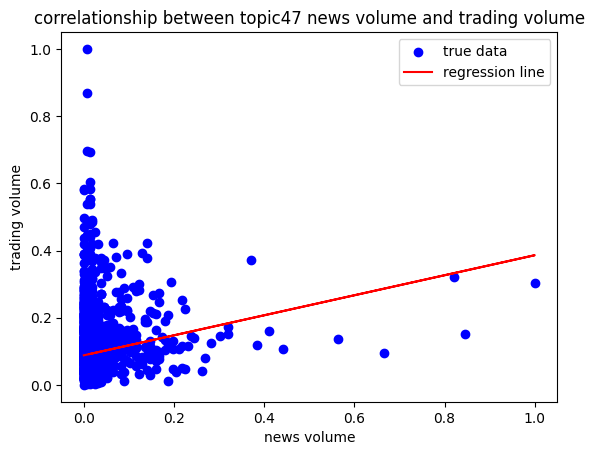

In [17]:
###### Lasso회귀로 토픽별 거래량 예측

# StandardScaler를 사용한 표준화
scaler = MinMaxScaler()
topic['news_volume_scaled'] = scaler.fit_transform(topic['news_volume'].values.reshape(-1, 1))
stock['trading_volume_scaled'] = scaler.fit_transform(stock['trading_volume'].values.reshape(-1, 1))

# x : 기사량, y : 거래량
X = topic['news_volume_scaled'].values.reshape(-1, 1)
y = stock['trading_volume_scaled'].values.reshape(-1, 1)

y_pred = lasso_model.predict(X)
print('예측된 y :')
print(y_pred)
topic['pred_trading_vol_scaled'] = y_pred

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('훈련량, mse, mae, r2 :', cv, mse, mae, r2)

###### (뉴스량, 거래량) 시각화
plt.scatter(X, y, label='true data', color='blue')
plt.plot(X, y_pred, label='regression line', color='red')
plt.xlabel('news volume')
plt.ylabel('trading volume')
plt.title(f'correlationship between topic{topicNo} news volume and trading volume')
plt.legend()
plt.show()

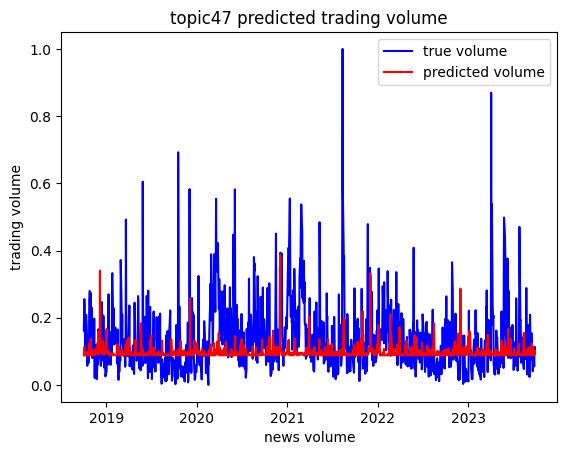

In [18]:
###### 시계열로 시각화
plt.plot(date, y, label='true volume', color='blue')
plt.plot(date, y_pred, label='predicted volume', color='red')
plt.xlabel('news volume')
plt.ylabel('trading volume')
plt.title(f'topic{topicNo} predicted trading volume')
plt.legend()
plt.show()

# for문으로 저장

In [ ]:
# y절편
intercept = lasso_model.intercept_
intercept

array([0.08810285])

In [19]:
topic_list = [1,2,3,4,6,7,9,10,11,14,15,16,19,20,21,28,33,35,39,44,47,49]

for topicNo in topic_list :

  topic = pd.read_csv(f'/content/drive/MyDrive/SK하이닉스/07. LASSO 회귀/토픽별 일간 기사량/topic{topicNo}_newsvolume.csv')
  topic = pd.merge(stock, topic, how='left')
  topic = topic.fillna(0)

  # 정규화
  scaler = MinMaxScaler()
  topic['news_volume_scaled'] = scaler.fit_transform(topic['news_volume'].values.reshape(-1, 1))
  stock['trading_volume_scaled'] = scaler.fit_transform(stock['trading_volume'].values.reshape(-1, 1))

  # x : 기사량, y : 거래량
  X = topic['news_volume_scaled'].values.reshape(-1, 1)
  y = stock['trading_volume_scaled'].values.reshape(-1, 1)

  y_pred = lasso_model.predict(X)
  print(f'topic{topicNo} 예측된 y :', y_pred)
  topic['pred_trading_vol_scaled'] = y_pred

  # 평가 지표 계산
  mse = mean_squared_error(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print('mse, mae, r2 :', mse, mae, r2)
  print()

  # 저장
  # topic.to_csv(f'/content/drive/MyDrive/SK하이닉스/07. LASSO 회귀/토픽별 일간 예측된 거래량/topic{topicNo}_pred_volume.csv', index=False)


topic1 예측된 y : [0.11747637 0.15943855 0.13006503 ... 0.13845746 0.14265368 0.17622343]
mse, mae, r2 : 0.008973504764417698 0.06494871479432461 0.13037332051532768

topic2 예측된 y : [0.19982715 0.24637894 0.22775823 ... 0.13465464 0.15327536 0.143965  ]
mse, mae, r2 : 0.012248354229394234 0.0867089778332724 -0.18699392236310253

topic3 예측된 y : [0.08810285 0.08810285 0.08810285 ... 0.08810285 0.08810285 0.08810285]
mse, mae, r2 : 0.01269229653762508 0.0718573050136321 -0.23001658580675466

topic4 예측된 y : [0.08810285 0.08810285 0.08810285 ... 0.08810285 0.08810285 0.08810285]
mse, mae, r2 : 0.012500772507371407 0.07116896931316284 -0.21145589955945288

topic6 예측된 y : [0.10938367 0.09874326 0.08810285 ... 0.09874326 0.08810285 0.09874326]
mse, mae, r2 : 0.011840802158534483 0.06998930214870312 -0.14749785439373686

topic7 예측된 y : [0.08810285 0.08810285 0.08810285 ... 0.08810285 0.08810285 0.08810285]
mse, mae, r2 : 0.012583908912142451 0.07150937377844553 -0.21951268868737706

topic9 예측된 y :